# GitHub Users in Chicago - Data Analysis

This notebook analyzes GitHub user and repository data from Chicago-based developers with over 100 followers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set_palette("husl")

plt.rcParams['figure.figsize'] = [12, 6]

In [2]:
def clean_company_name(company):
    if pd.isna(company):
        return None
    company = str(company).strip().upper()
    if company.startswith('@'):
        company = company[1:]
    return company

# Read and preprocess data
users_df = pd.read_csv('users.csv')
repos_df = pd.read_csv('repositories.csv')

# Clean company names
users_df['company'] = users_df['company'].apply(clean_company_name)

# Convert dates and remove timezones
users_df['created_at'] = pd.to_datetime(users_df['created_at']).dt.tz_convert(None)
repos_df['created_at'] = pd.to_datetime(repos_df['created_at']).dt.tz_convert(None)

# Calculate account age
users_df['account_age'] = (datetime.now() - users_df['created_at']).dt.total_seconds() / (365.25 * 24 * 60 * 60)

## 1. Programming Language Analysis

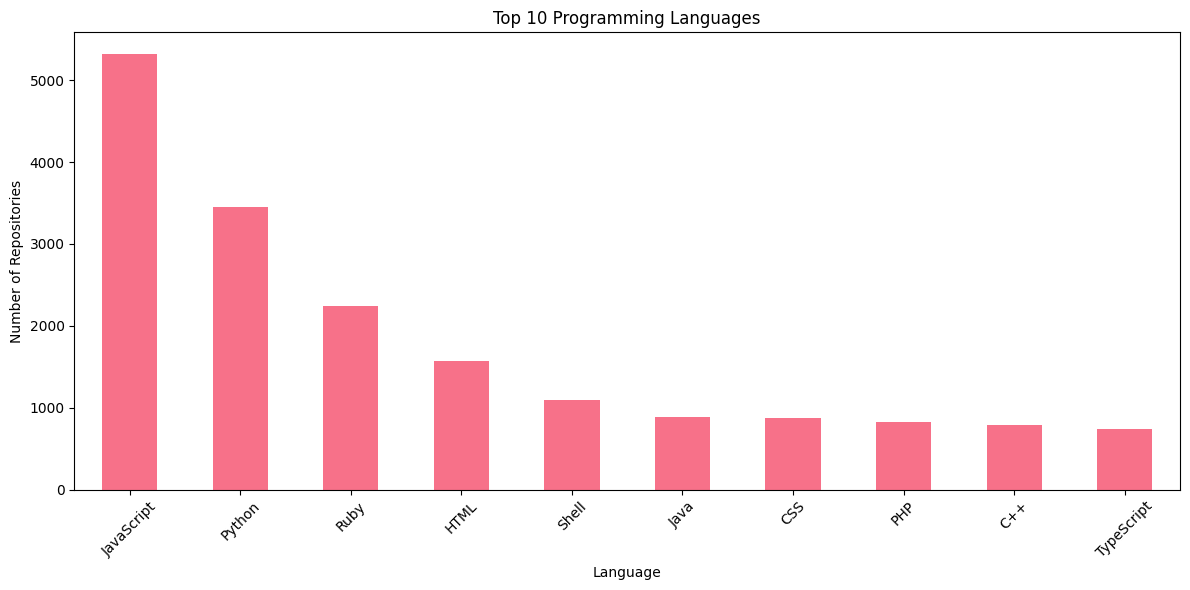

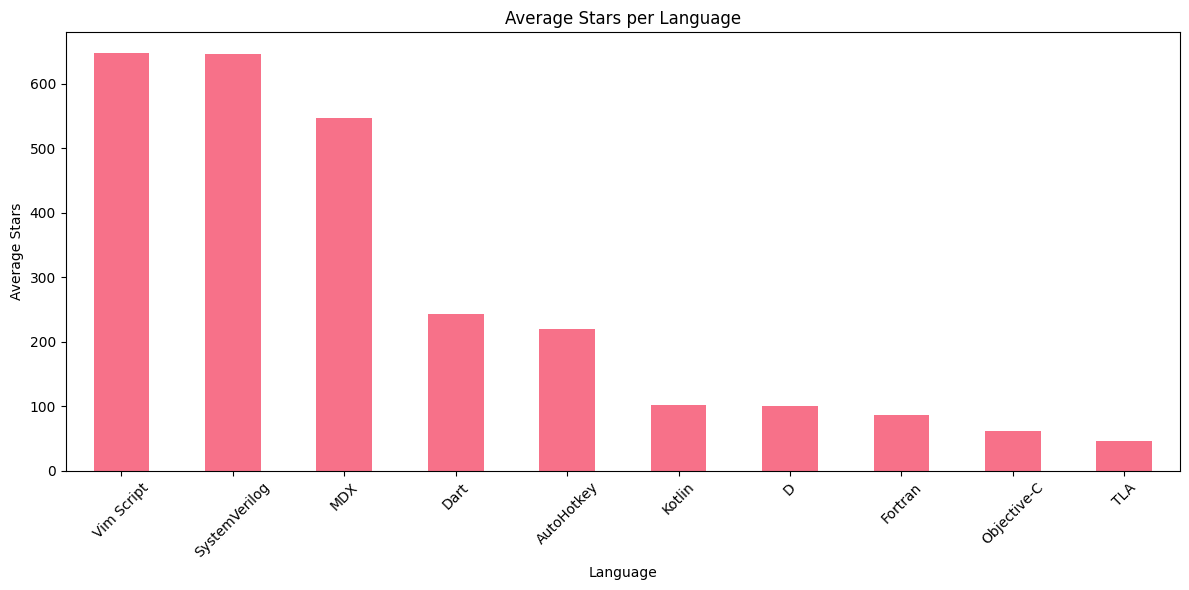

In [3]:
# Language distribution
lang_dist = repos_df['language'].value_counts().head(10)

plt.figure(figsize=(12, 6))
lang_dist.plot(kind='bar')
plt.title('Top 10 Programming Languages')
plt.xlabel('Language')
plt.ylabel('Number of Repositories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average stars by language
lang_stars = repos_df.groupby('language')['stargazers_count'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
lang_stars.plot(kind='bar')
plt.title('Average Stars per Language')
plt.xlabel('Language')
plt.ylabel('Average Stars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. Developer Productivity Analysis

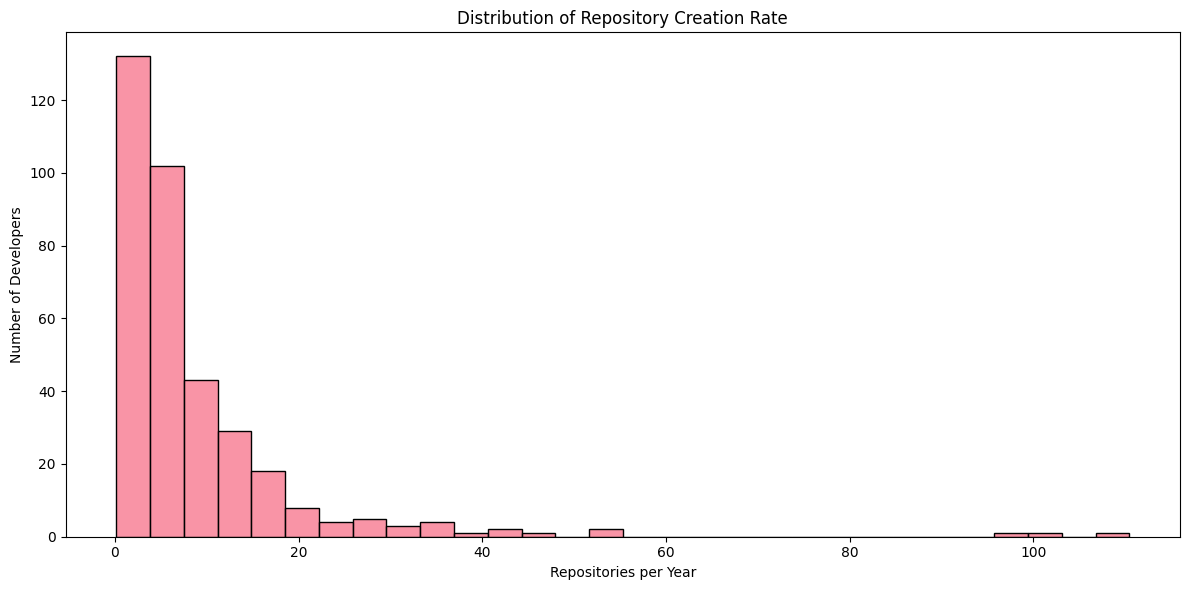


Top 5 Most Productive Developers:
                 login  repos_per_year  public_repos  account_age
61        austinsonger      110.475070           840     7.603525
213          marwahaha       99.574299          1200    12.051303
216         luisdomin5       98.391000           421     4.278847
336       maxmiller413       52.538186           207     3.939991
353  erichilarysmithsr       52.163800           579    11.099651


In [4]:
# Calculate repositories per year
users_df['repos_per_year'] = users_df['public_repos'] / users_df['account_age']

plt.figure(figsize=(12, 6))
sns.histplot(data=users_df, x='repos_per_year', bins=30)
plt.title('Distribution of Repository Creation Rate')
plt.xlabel('Repositories per Year')
plt.ylabel('Number of Developers')
plt.tight_layout()
plt.show()

# Print top 5 most productive developers
print("\nTop 5 Most Productive Developers:")
print(users_df.nlargest(5, 'repos_per_year')[['login', 'repos_per_year', 'public_repos', 'account_age']])

## 3. Company Analysis

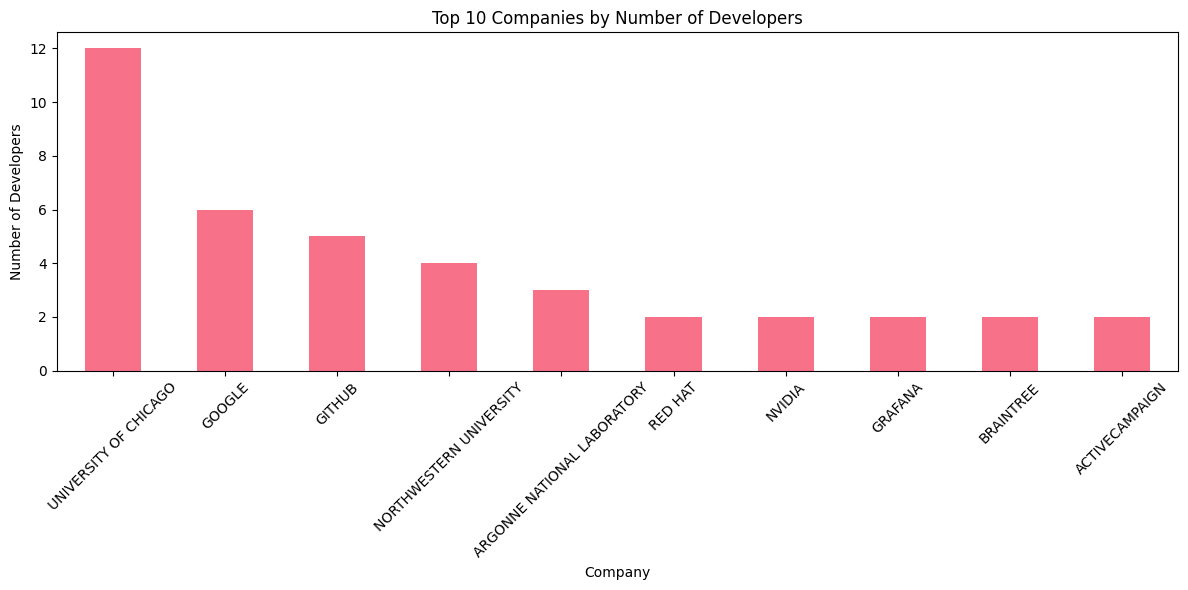

In [5]:
# Company distribution
company_dist = users_df['company'].value_counts().head(10)

plt.figure(figsize=(12, 6))
company_dist.plot(kind='bar')
plt.title('Top 10 Companies by Number of Developers')
plt.xlabel('Company')
plt.ylabel('Number of Developers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Repository Feature Analysis

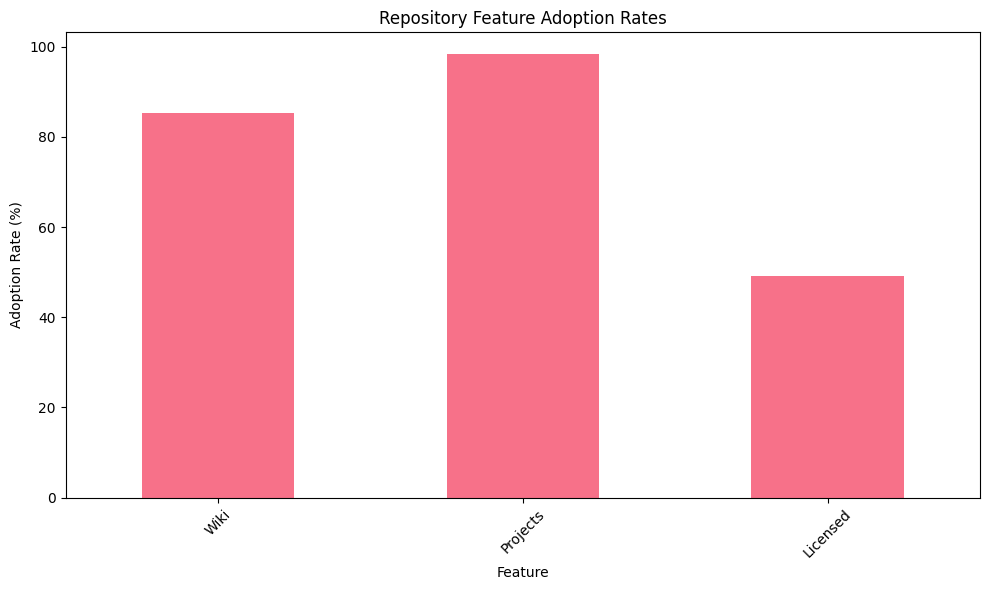

In [6]:
# Calculate feature adoption rates
feature_rates = pd.Series({
    'Wiki': (repos_df['has_wiki'].sum() / len(repos_df)) * 100,
    'Projects': (repos_df['has_projects'].sum() / len(repos_df)) * 100,
    'Licensed': (repos_df['license_name'].notna().sum() / len(repos_df)) * 100
})

plt.figure(figsize=(10, 6))
feature_rates.plot(kind='bar')
plt.title('Repository Feature Adoption Rates')
plt.xlabel('Feature')
plt.ylabel('Adoption Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Popularity Analysis

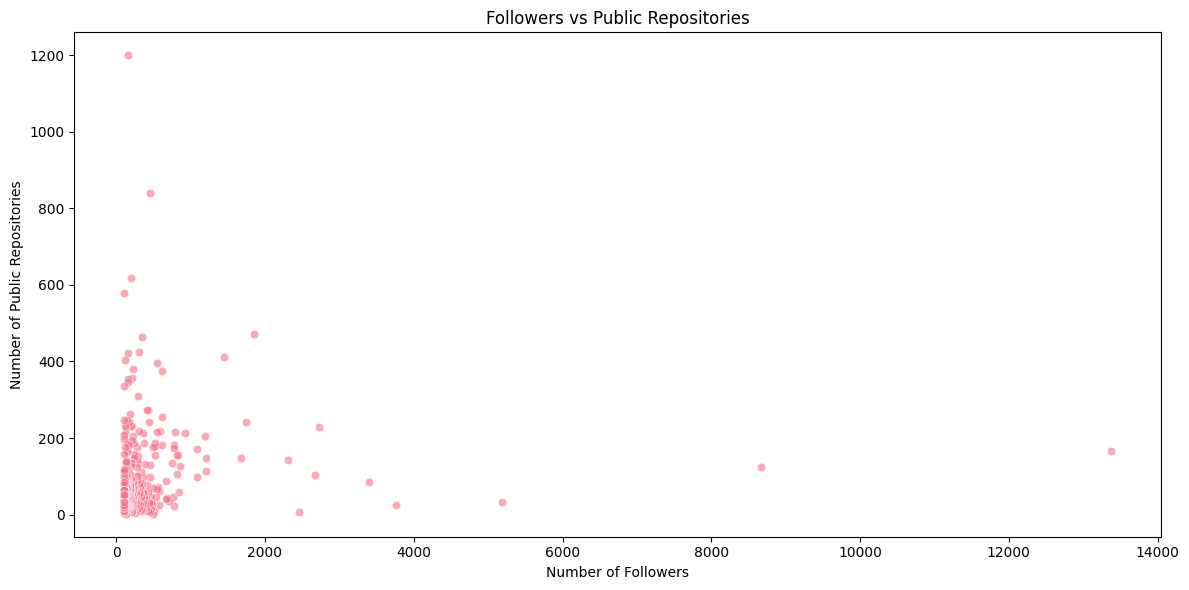


Top 5 Developers by Stars per Repository:
                Stars per Repo
login                         
nicholas-ochoa      711.285714
sstephenson         658.791667
coolbeet            607.000000
iSoron              568.500000
XavierXiao          478.125000


In [7]:
# Calculate stars per repository for each user
user_stars = repos_df.groupby('login')['stargazers_count'].sum()
user_repos = repos_df.groupby('login').size()
stars_per_repo = (user_stars / user_repos).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=users_df, x='followers', y='public_repos', alpha=0.6)
plt.title('Followers vs Public Repositories')
plt.xlabel('Number of Followers')
plt.ylabel('Number of Public Repositories')
plt.tight_layout()
plt.show()

# Print top 5 most efficient developers (stars per repo)
print("\nTop 5 Developers by Stars per Repository:")
print(stars_per_repo.head().to_frame('Stars per Repo'))

## 6. License Analysis

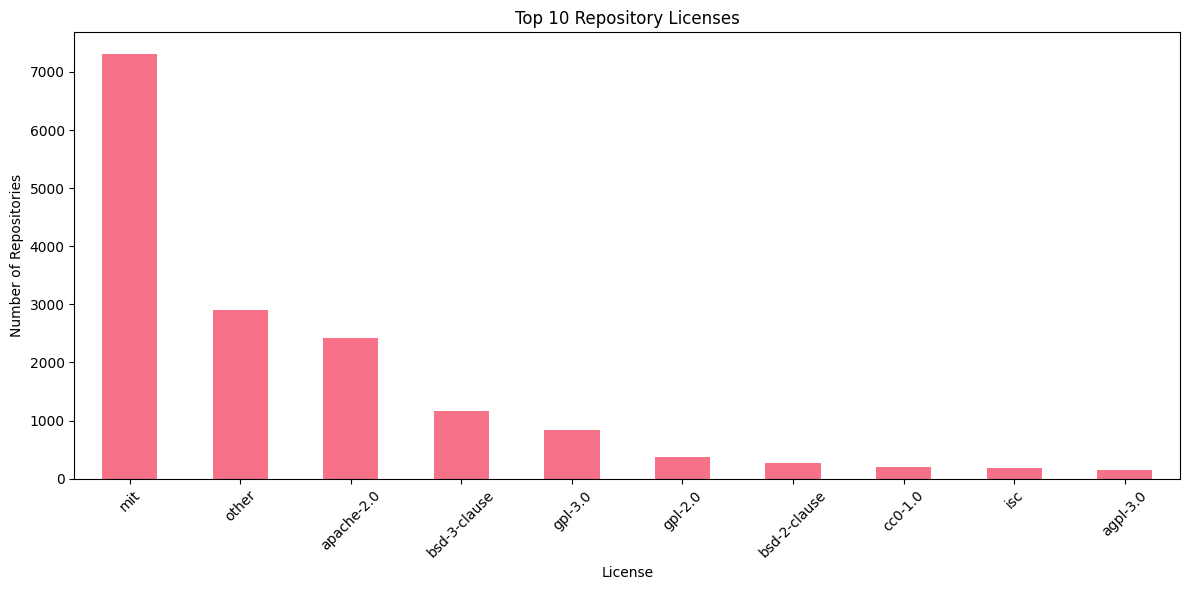

In [8]:
# License distribution
license_dist = repos_df['license_name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
license_dist.plot(kind='bar')
plt.title('Top 10 Repository Licenses')
plt.xlabel('License')
plt.ylabel('Number of Repositories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Key Insights

Key Insights:
- Average repositories per developer: 97.8
- Average followers per developer: 395.7
- Most common programming language: JavaScript
- Average stars per repository: 12.8
- Wiki adoption rate: 85.3%
- Project board adoption rate: 98.3%
- Repositories without licenses: 50.8%


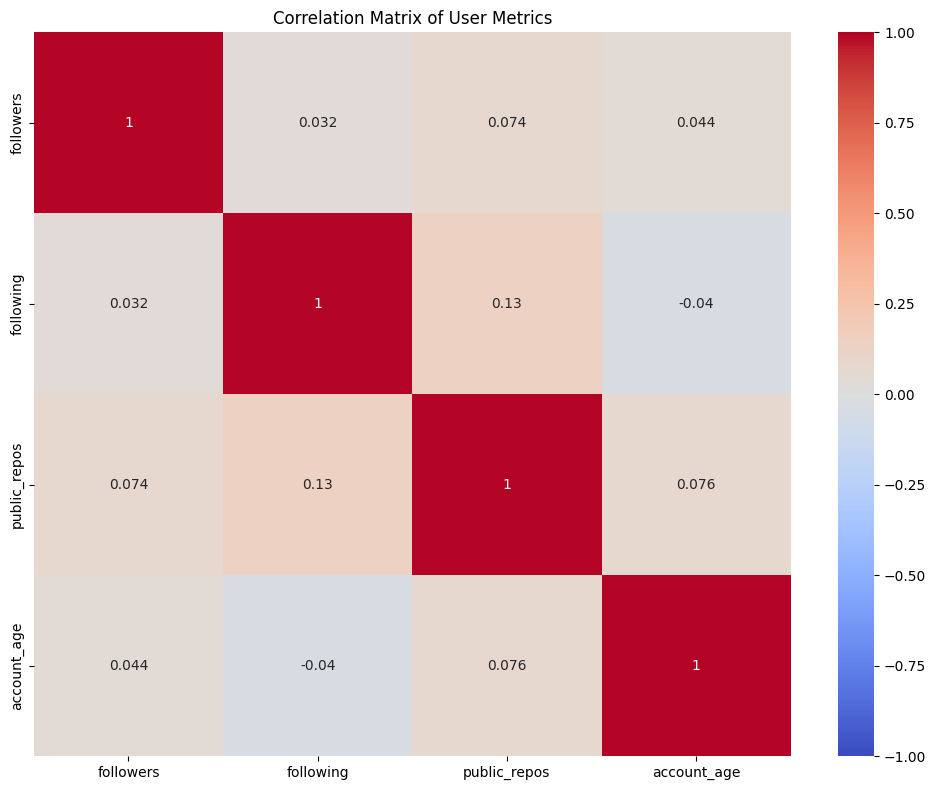

In [9]:
# Calculate and print key insights
insights = [
    f"Average repositories per developer: {users_df['public_repos'].mean():.1f}",
    f"Average followers per developer: {users_df['followers'].mean():.1f}",
    f"Most common programming language: {repos_df['language'].mode().iloc[0]}",
    f"Average stars per repository: {repos_df['stargazers_count'].mean():.1f}",
    f"Wiki adoption rate: {(repos_df['has_wiki'].sum() / len(repos_df) * 100):.1f}%",
    f"Project board adoption rate: {(repos_df['has_projects'].sum() / len(repos_df) * 100):.1f}%",
    f"Repositories without licenses: {(repos_df['license_name'].isna().sum() / len(repos_df) * 100):.1f}%"
]

print("Key Insights:")
for insight in insights:
    print(f"- {insight}")

# Calculate correlation matrix for numerical columns
correlation_columns = ['followers', 'following', 'public_repos', 'account_age']
correlation_matrix = users_df[correlation_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of User Metrics')
plt.tight_layout()
plt.show()